In [1]:
import time

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import torch

In [2]:
def time_torch(n, max_iter=100):
    x = np.random.randn(n, n)
    y = torch.Tensor(x)
    data = []
    for _ in range(max_iter):
        start = time.time()
        _ = y.numpy()
        data += [{'time': time.time() - start,
                  'n': n, 'max_iter': max_iter,
                  'library': 'torch'}]
    return data

In [3]:
def time_tf(n, max_iter=100):
    x = np.random.randn(n, n)
    c = tf.Variable(initial_value=x)
    session.run(c.initializer)
    _ = c.eval()  # Ignore first, slow step.
    data = []
    for _ in range(max_iter):
        start = time.time()
        _ = c.eval()
        data += [{'time': time.time() - start,
                  'n': n, 'max_iter': max_iter,
                  'library': 'tensorflow'}]
    return data

In [4]:
data = []
N = np.logspace(1, 3, num=10, dtype=int)

In [5]:
for n in N:
    print(n)
    data += time_torch(n)

10
16
27
46
77
129
215
359
599
1000


In [6]:
with tf.Session() as session:
    for n in N:
        print(n)
        data += time_tf(n)


10
16
27
46
77
129
215
359
599
1000


In [7]:
from altair import Chart, X, Y, Scale
import pandas as pd

df = pd.DataFrame(data)
df[df.library == 'torch'].describe()

,max_iter,n,time
count,1000.0,1000.000000,1.000000e+03
mean,100.0,247.800000,8.835793e-07
std,0.0,307.664781,9.144217e-06
min,100.0,10.000000,0.000000e+00
25%,100.0,27.000000,0.000000e+00
50%,100.0,103.000000,9.536743e-07
75%,100.0,359.000000,9.536743e-07
max,100.0,1000.000000,2.889633e-04


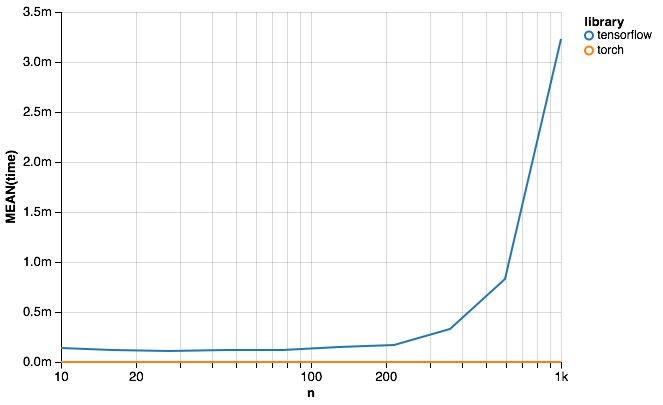

In [9]:
Chart(df).mark_line().encode(
    x=X('n', scale=Scale(type='log')),
    # had to use mean; min(torch_times) == 0, so they don't show in log plot
    y=Y('mean(time)', scale=Scale(type='linear')),
    color='library')

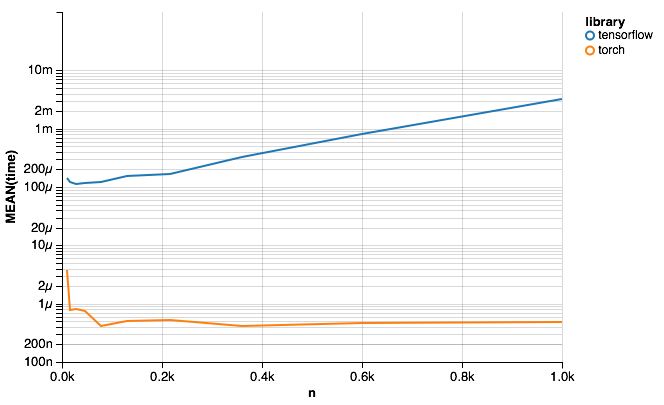

In [10]:
Chart(df).mark_line().encode(
    x=X('n', scale=Scale(type='linear')),
    # had to use mean; min(torch_times) == 0, so they don't show in log plot
    y=Y('mean(time)', scale=Scale(type='log')),
    color='library')